In [34]:
#!/usr/bin/env python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig_prefix = "../../figures/2018-07-22-jw-weaselball-heatmap_"
data_prefix = "../../data/2018-07-22-jw-weaselball-heatmap_"


In [35]:
df = pd.read_csv('../../data/2018-07-22-jw-weaselball_analysis_markov4_100.csv')
print(df.shape)
df = df.apply(pd.to_numeric)
df.head()


(63, 63)


,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,0.971353,0.016802,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011845
1,0.012952,0.967993,0.019055,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.000000,0.005112,0.985003,0.000018,0.009868,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.000000,0.000000,0.333333,0.333333,0.333333,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.000000,0.000000,0.009525,0.000022,0.978229,0.012224,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [36]:
df_import_m = pd.read_csv('../../data/2018-07-22-jw-weaselball_analysis_magnitude_vector_out.csv',  header=None);
magnitude_V = df_import_m.iloc[:,0]
magnitude_V = magnitude_V.apply(pd.to_numeric)
magnitude_V = magnitude_V.astype(float)
magnitude_V.head()

0    23807.0
1    21464.0
2    56343.0
3        3.0
4    45565.0
Name: 0, dtype: float64

In [37]:
NUMBER_OF_SQUARES = 100 #This should be a square number to create equal sized squares.
RESOLUTION_OF_S1 = 0.1 #This is used to discretize the yaw angle over 0 - 2*pi

X_MAX = NUMBER_OF_SQUARES ** (1/2.0)
Y_MAX = NUMBER_OF_SQUARES ** (1/2.0)
YAW_MAX = (2 * np.pi) / RESOLUTION_OF_S1

def map1Dto3D(element):
    z = int(element / (X_MAX * Y_MAX));
    element -= int(z * X_MAX * Y_MAX)
    y = int(element / X_MAX)
    x = int(element % X_MAX)
    return ( x, y, z );
           
def map3Dto1D(x,y,yaw):
    return int((yaw*X_MAX*Y_MAX) + (y*X_MAX) + x)


In [38]:
print(map1Dto3D(map3Dto1D(5,5,2)))

(5, 5, 2)


In [39]:
#This isnt needed because of the hueristic
#This was previously used to estimate the size of the rows. Now we use the magnitude vector as replacement
#for index, row in df_regularized.iterrows():
#    multiplyer = 1.0/row.min() 
#    df_regularized.iloc[index] *= multiplyer
#df_regularized.head()

#Instead we now take the rows and multiply it by a scaler in the magnitude vector
df_regularized = df.copy()
for index,row in df_regularized.iterrows():
    multiplyer = magnitude_V.iloc[index]
    df_regularized.iloc[index] *= multiplyer
df_regularized.head()

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,23125.0,400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,282.0
1,278.0,20777.0,409.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,288.0,55498.0,1.0,556.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,434.0,1.0,44573.0,557.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
sumEvents = 0
for index,row in df_regularized.iterrows():
    sumEvents += row.sum()
print(magnitude_V.sum())
sumEvents


1930375.0


1930375.0

In [41]:
#Create heatmap of where structure is
heatmap_index = range(10)
size_of_rotation_series = int((2*np.pi)/RESOLUTION_OF_S1)

heatmap_rotation = pd.Series(0.0, index=range(size_of_rotation_series + 1))
heatmap = pd.DataFrame(0.0, index=range(10), columns=range(10))


In [42]:
#Fill in heatmap

for index, row in df_regularized.iterrows():
    coordinates_in_3d = map1Dto3D(index)
    total_states = row.sum()
    heatmap.at[coordinates_in_3d[0],coordinates_in_3d[1]] += total_states
    heatmap_rotation.at[coordinates_in_3d[2]] += total_states

heatmap

,0,1,2,3,4,5,6,7,8,9
0,23807.0,29146.0,51738.0,25204.0,50392.0,82911.0,59932.0,0.0,0.0,0.0
1,21464.0,66776.0,38689.0,25365.0,3.0,3.0,2.0,0.0,0.0,0.0
2,56343.0,3.0,53843.0,48494.0,83888.0,72185.0,22906.0,0.0,0.0,0.0
3,3.0,49468.0,23488.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0
4,45565.0,3.0,3.0,32284.0,42512.0,26087.0,0.0,0.0,0.0,0.0
5,57804.0,20477.0,26718.0,48957.0,49325.0,52177.0,0.0,0.0,0.0,0.0
6,24195.0,18151.0,31848.0,44555.0,3.0,3.0,0.0,0.0,0.0,0.0
7,3.0,21293.0,81927.0,62721.0,46837.0,70360.0,0.0,0.0,0.0,0.0
8,22986.0,67280.0,28930.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0
9,22378.0,3.0,3.0,23026.0,25958.0,49932.0,0.0,0.0,0.0,0.0


In [43]:
heatmap_rotation

0     1930375.0
1           0.0
2           0.0
3           0.0
4           0.0
5           0.0
6           0.0
7           0.0
8           0.0
9           0.0
10          0.0
11          0.0
12          0.0
13          0.0
14          0.0
15          0.0
16          0.0
17          0.0
18          0.0
19          0.0
20          0.0
21          0.0
22          0.0
23          0.0
24          0.0
25          0.0
26          0.0
27          0.0
28          0.0
29          0.0
        ...    
33          0.0
34          0.0
35          0.0
36          0.0
37          0.0
38          0.0
39          0.0
40          0.0
41          0.0
42          0.0
43          0.0
44          0.0
45          0.0
46          0.0
47          0.0
48          0.0
49          0.0
50          0.0
51          0.0
52          0.0
53          0.0
54          0.0
55          0.0
56          0.0
57          0.0
58          0.0
59          0.0
60          0.0
61          0.0
62          0.0
Length: 63, dtype: float

In [44]:
#I am not sure if this is neccessary. This tries to take out the +1 given to all events.
#Get the position heatmap have the lowest at 0
#import sys
#heatmap_without_n = heatmap.copy()

#minimum = sys.maxint
#for index, row in heatmap.iterrows():
#    minimum = min(minimum, row.min())
    
#print(minimum)
#for index, row in heatmap.iterrows():
#    heatmap_without_n.iloc[index] -= minimum
#heatmap_without_n.head()

In [45]:
#heatmap_rotation_without_n = heatmap_rotation.copy()
#minimum = heatmap_rotation_without_n.min()
#heatmap_rotation_without_n -= minimum
#heatmap_rotation_without_n.head()


/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-pack

,0,1,2,3,4,5,6,7,8,9
0,10.077777,10.280107,10.853967,10.134798,10.827608,11.325535,11.000983,0.0,0.0,0.0
1,9.974179,11.109114,10.563336,10.141165,1.386294,1.386294,1.098612,0.0,0.0,0.0
2,10.939231,1.386294,10.893846,10.789216,11.337250,11.187001,10.039198,0.0,0.0,0.0
3,1.386294,10.809101,10.064288,1.386294,1.386294,1.386294,0.000000,0.0,0.0,0.0
4,10.726917,1.386294,1.386294,10.382358,10.657565,10.169231,0.000000,0.0,0.0,0.0
5,10.964831,9.927106,10.193130,10.798718,10.806207,10.862416,0.000000,0.0,0.0,0.0
6,10.093943,9.806536,10.368761,10.704502,1.386294,1.386294,0.000000,0.0,0.0,0.0
7,1.386294,9.966181,11.313596,11.046468,10.754450,11.161394,0.000000,0.0,0.0,0.0
8,10.042684,11.116633,10.272669,1.386294,1.386294,1.386294,0.000000,0.0,0.0,0.0
9,10.015878,1.386294,1.386294,10.044423,10.164274,10.818437,0.000000,0.0,0.0,0.0


/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-pack

/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-pack

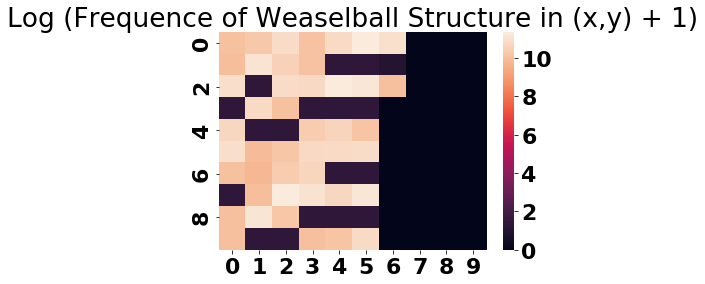

In [46]:
#Create graphic heatmap of position without n taken out
#Take the log of everything so it can be graphed, add 1 to get rid of log(0)
for index, row in heatmap.iterrows():
    heatmap.iloc[index] += 1
    heatmap.iloc[index] = np.log(heatmap.iloc[index])
heatmap_position = sns.heatmap(heatmap, annot=False).set_title('Log (Frequence of Weaselball Structure in (x,y) + 1)')
plot = heatmap_position.get_figure()
plot.savefig(fig_prefix + "position_heatmap0.png")
heatmap

/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-pack

/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-pack

/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-pack

/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-pack

/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-pack

/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-pack

/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-pack

/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-pack

/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-pack

/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-pack

/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-pack

/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-pack

/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-pack

/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-pack

/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-pack

/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-pack

/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-pack

/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-pack

/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-pack

/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-pack

/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-pack

/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-pack

/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-pack

/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-pack

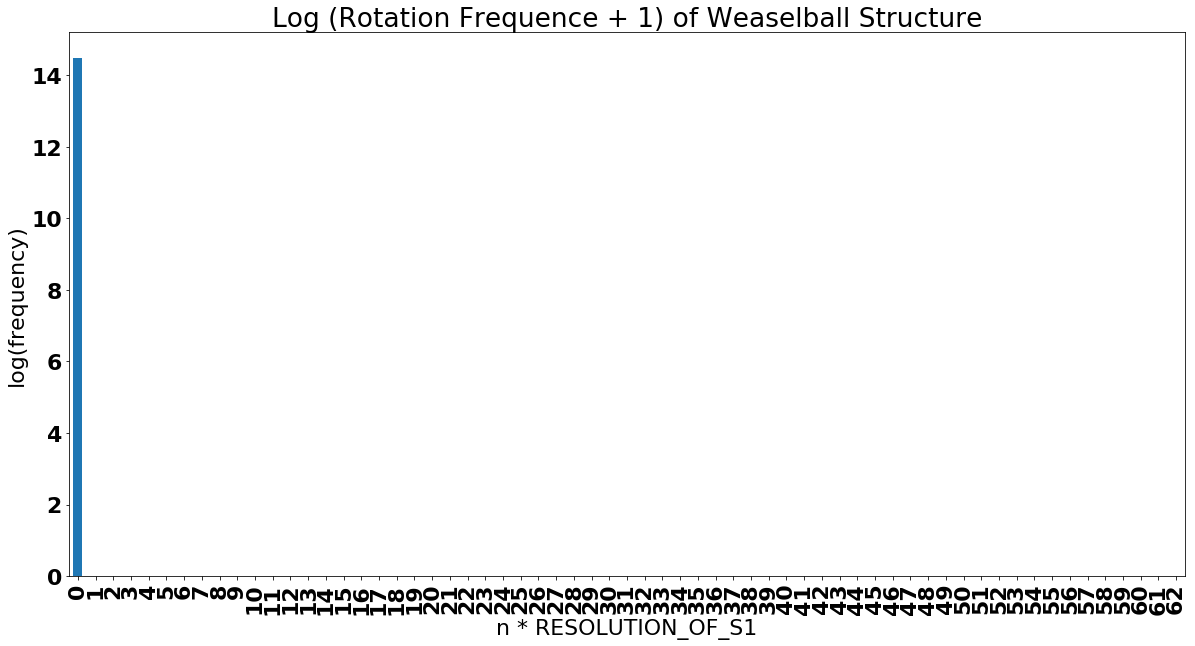

In [47]:
#Create graphic heatmap of rotation without n taken out
#Take the log of everything to it can be graphed better, add 1 to get rid of log(0)
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

heatmap_rotation += 1
heatmap_rotation = np.log(heatmap_rotation)
plt.figure(figsize=(20,10))
plt.title('Log (Rotation Frequence + 1) of Weaselball Structure')
plt.xlabel('n * RESOLUTION_OF_S1')
plt.ylabel('log(frequency)')
heatmap_rotation.plot.bar()
plt.savefig(fig_prefix + "rotation_heatmap.png")
plt.show()


In [48]:
#Create graphic heatmap of rotation with n taken out
#Take the log of everything to it can be graphed better, add 1 to get rid of log(0)
#heatmap_rotation_without_n += 1
#heatmap_rotation_without_n = np.log(heatmap_rotation_without_n)
#plt.figure(figsize=(20,10))
#plt.title('Log Rotation Frequence of Weaselball Structure with n taken out')
#plt.xlabel('n * RESOLUTION_OF_S1')
#plt.ylabel('log(frequency)')
#heatmap_rotation_without_n.plot.bar()
#plt.savefig(fig_prefix + "rotation_heatmap_without_n.png")
#plt.show()



In [49]:
#Create graphic heatmap of position with n taken out
#Take the log of everything so it can be graphed, add 1 to get rid of log(0)
#for index, row in heatmap_without_n.iterrows():
#    heatmap_without_n.iloc[index] += 1
#    heatmap_without_n.iloc[index] = np.log(heatmap_without_n.iloc[index])
#heatmap_position = sns.heatmap(heatmap_without_n, annot=False).set_title('Log Frequence of Weaselball Structure in (x,y) with n taken out')
#plot = heatmap_position.get_figure()
#plot.savefig(fig_prefix + "position_heatmap_without_n.png")
#heatmap_without_n

In [50]:
d = {(0.0, 0.0, 0.8, 0.0, 0.0, 0.8): 22326,
 (0.0, 0.0, 0.8, 0.0, 0.0, 0.7): 275,
 (0.0, 0.0, 0.7, 0.0, 0.0, 0.7): 23516,
 (0.0, 0.0, 0.7, 0.0, 0.0, 0.6): 280,
 (0.0, 0.0, 0.6, 0.0, 0.0, 0.6): 24326,
 (0.0, 0.0, 0.6, 0.0, 0.0, 0.7): 401,
 (0.0, 0.0, 0.6, 0.0, 0.0, 0.5): 308,
 (0.0, 0.0, 0.5, 0.0, 0.0, 0.5): 31903,
 (0.0, 0.0, 0.5, 0.0, 0.0, 0.4): 434,
 (0.0, 0.0, 0.4, 0.0, 0.0, 0.4): 44572,
 (0.0, 0.0, 0.4, 0.0, 0.0, 0.3): 434,
 (0.0, 0.0, 0.3, 0.0, 0.0, 0.3): 31666,
 (0.0, 0.0, 0.3, 0.0, 0.0, 0.2): 320,
 (0.0, 0.0, 0.2, 0.0, 0.0, 0.2): 23070,
 (0.0, 0.0, 0.2, 0.0, 0.0, 0.1): 287,
 (0.0, 0.0, 0.1, 0.0, 0.0, 0.1): 20776,
 (0.0, 0.0, 0.1, 0.0, 0.0, 0.0): 277,
 (0.0, 0.0, 0.0, 0.0, 0.0, 0.0): 23124,
 (0.0, 0.0, 0.0, 0.0, 0.0, 6.2): 282,
 (0.0, 0.0, 6.2, 0.0, 0.0, 6.2): 22192,
 (0.0, 0.0, 6.2, 0.0, 0.0, 6.1): 310,
 (0.0, 0.0, 6.1, 0.0, 0.0, 6.1): 26658,
 (0.0, 0.0, 6.1, 0.0, 0.0, 6.0): 354,
 (0.0, 0.0, 6.0, 0.0, 0.0, 6.0): 31567,
 (0.0, 0.0, 6.0, 0.0, 0.0, 5.9): 443,
 (0.0, 0.0, 5.9, 0.0, 0.0, 5.9): 48839,
 (0.0, 0.0, 5.9, 0.0, 0.0, 5.8): 525,
 (0.0, 0.0, 5.8, 0.0, 0.0, 5.8): 40579,
 (0.0, 0.0, 5.8, 0.0, 0.0, 5.7): 357,
 (0.0, 0.0, 5.7, 0.0, 0.0, 5.7): 27985,
 (0.0, 0.0, 5.7, 0.0, 0.0, 5.6): 305,
 (0.0, 0.0, 5.6, 0.0, 0.0, 5.6): 25668,
 (0.0, 0.0, 5.6, 0.0, 0.0, 5.7): 428,
 (0.0, 0.0, 5.6, 0.0, 0.0, 5.5): 297,
 (0.0, 0.0, 5.5, 0.0, 0.0, 5.5): 25051,
 (0.0, 0.0, 5.5, 0.0, 0.0, 5.6): 420,
 (0.0, 0.0, 5.7, 0.0, 0.0, 5.8): 481,
 (0.0, 0.0, 5.8, 0.0, 0.0, 5.9): 650,
 (0.0, 0.0, 5.9, 0.0, 0.0, 6.0): 565,
 (0.0, 0.0, 6.0, 0.0, 0.0, 6.1): 476,
 (0.0, 0.0, 6.1, 0.0, 0.0, 6.2): 431,
 (0.0, 0.0, 6.2, 0.0, 0.0, 0.0): 403,
 (0.0, 0.0, 0.0, 0.0, 0.0, 0.1): 399,
 (0.0, 0.0, 0.1, 0.0, 0.0, 0.2): 408,
 (0.0, 0.0, 0.2, 0.0, 0.0, 0.3): 441,
 (0.0, 0.0, 0.3, 0.0, 0.0, 0.4): 556,
 (0.0, 0.0, 0.4, 0.0, 0.0, 0.5): 556,
 (0.0, 0.0, 0.5, 0.0, 0.0, 0.6): 429,
 (0.0, 0.0, 0.7, 0.0, 0.0, 0.8): 396,
 (0.0, 0.0, 0.8, 0.0, 0.0, 0.9): 382,
 (0.0, 0.0, 0.9, 0.0, 0.0, 0.9): 21715,
 (0.0, 0.0, 0.9, 0.0, 0.0, 0.8): 259,
 (0.0, 0.0, 0.9, 0.0, 0.0, 1.0): 401,
 (0.0, 0.0, 1.0, 0.0, 0.0, 1.0): 28413,
 (0.0, 0.0, 1.0, 0.0, 0.0, 1.1): 453,
 (0.0, 0.0, 1.1, 0.0, 0.0, 1.1): 30150,
 (0.0, 0.0, 1.1, 0.0, 0.0, 1.2): 544,
 (0.0, 0.0, 1.2, 0.0, 0.0, 1.2): 34856,
 (0.0, 0.0, 1.2, 0.0, 0.0, 1.3): 474,
 (0.0, 0.0, 1.3, 0.0, 0.0, 1.3): 25694,
 (0.0, 0.0, 1.3, 0.0, 0.0, 1.4): 418,
 (0.0, 0.0, 1.4, 0.0, 0.0, 1.4): 22301,
 (0.0, 0.0, 1.4, 0.0, 0.0, 1.5): 407,
 (0.0, 0.0, 1.5, 0.0, 0.0, 1.5): 19790,
 (0.0, 0.0, 1.5, 0.0, 0.0, 1.6): 401,
 (0.0, 0.0, 1.6, 0.0, 0.0, 1.6): 17482,
 (0.0, 0.0, 1.6, 0.0, 0.0, 1.7): 391,
 (0.0, 0.0, 1.7, 0.0, 0.0, 1.7): 20587,
 (0.0, 0.0, 1.7, 0.0, 0.0, 1.8): 438,
 (0.0, 0.0, 1.8, 0.0, 0.0, 1.8): 27128,
 (0.0, 0.0, 1.8, 0.0, 0.0, 1.9): 509,
 (0.0, 0.0, 1.9, 0.0, 0.0, 1.9): 38274,
 (0.0, 0.0, 1.9, 0.0, 0.0, 2.0): 672,
 (0.0, 0.0, 2.0, 0.0, 0.0, 2.0): 50631,
 (0.0, 0.0, 2.0, 0.0, 0.0, 2.1): 560,
 (0.0, 0.0, 2.1, 0.0, 0.0, 2.1): 37760,
 (0.0, 0.0, 2.1, 0.0, 0.0, 2.2): 493,
 (0.0, 0.0, 2.2, 0.0, 0.0, 2.2): 28765,
 (0.0, 0.0, 2.2, 0.0, 0.0, 2.3): 451,
 (0.0, 0.0, 2.3, 0.0, 0.0, 2.3): 23535,
 (0.0, 0.0, 2.3, 0.0, 0.0, 2.4): 399,
 (0.0, 0.0, 2.4, 0.0, 0.0, 2.4): 22799,
 (0.0, 0.0, 2.4, 0.0, 0.0, 2.5): 414,
 (0.0, 0.0, 2.5, 0.0, 0.0, 2.5): 25964,
 (0.0, 0.0, 2.5, 0.0, 0.0, 2.6): 465,
 (0.0, 0.0, 2.6, 0.0, 0.0, 2.6): 30986,
 (0.0, 0.0, 2.6, 0.0, 0.0, 2.7): 522,
 (0.0, 0.0, 2.7, 0.0, 0.0, 2.7): 42233,
 (0.0, 0.0, 2.7, 0.0, 0.0, 2.8): 644,
 (0.0, 0.0, 2.8, 0.0, 0.0, 2.8): 37636,
 (0.0, 0.0, 2.8, 0.0, 0.0, 2.9): 505,
 (0.0, 0.0, 2.9, 0.0, 0.0, 2.9): 28104,
 (0.0, 0.0, 2.9, 0.0, 0.0, 3.0): 449,
 (0.0, 0.0, 3.0, 0.0, 0.0, 3.0): 24456,
 (0.0, 0.0, 3.0, 0.0, 0.0, 3.1): 427,
 (0.0, 0.0, 3.1, 0.0, 0.0, 3.1): 24640,
 (0.0, 0.0, 3.1, 0.0, 0.0, 3.2): 426,
 (0.0, 0.0, 3.2, 0.0, 0.0, 3.2): 23299,
 (0.0, 0.0, 3.2, 0.0, 0.0, 3.3): 436,
 (0.0, 0.0, 3.3, 0.0, 0.0, 3.3): 23707,
 (0.0, 0.0, 3.3, 0.0, 0.0, 3.4): 452,
 (0.0, 0.0, 3.4, 0.0, 0.0, 3.4): 31420,
 (0.0, 0.0, 3.4, 0.0, 0.0, 3.5): 542,
 (0.0, 0.0, 3.5, 0.0, 0.0, 3.5): 47873,
 (0.0, 0.0, 3.5, 0.0, 0.0, 3.6): 672,
 (0.0, 0.0, 3.6, 0.0, 0.0, 3.6): 43470,
 (0.0, 0.0, 3.6, 0.0, 0.0, 3.7): 542,
 (0.0, 0.0, 3.7, 0.0, 0.0, 3.7): 34796,
 (0.0, 0.0, 3.7, 0.0, 0.0, 3.8): 457,
 (0.0, 0.0, 3.8, 0.0, 0.0, 3.8): 26323,
 (0.0, 0.0, 3.8, 0.0, 0.0, 3.9): 409,
 (0.0, 0.0, 3.9, 0.0, 0.0, 3.9): 22341,
 (0.0, 0.0, 3.9, 0.0, 0.0, 4.0): 406,
 (0.0, 0.0, 4.0, 0.0, 0.0, 4.0): 24302,
 (0.0, 0.0, 4.0, 0.0, 0.0, 4.1): 433,
 (0.0, 0.0, 4.1, 0.0, 0.0, 4.1): 24635,
 (0.0, 0.0, 4.1, 0.0, 0.0, 4.2): 448,
 (0.0, 0.0, 4.2, 0.0, 0.0, 4.2): 31266,
 (0.0, 0.0, 4.2, 0.0, 0.0, 4.3): 563,
 (0.0, 0.0, 4.3, 0.0, 0.0, 4.3): 50670,
 (0.0, 0.0, 4.3, 0.0, 0.0, 4.4): 639,
 (0.0, 0.0, 4.4, 0.0, 0.0, 4.4): 41511,
 (0.0, 0.0, 4.4, 0.0, 0.0, 4.5): 489,
 (0.0, 0.0, 4.5, 0.0, 0.0, 4.5): 27049,
 (0.0, 0.0, 4.5, 0.0, 0.0, 4.6): 441,
 (0.0, 0.0, 4.6, 0.0, 0.0, 4.6): 20751,
 (0.0, 0.0, 4.6, 0.0, 0.0, 4.7): 407,
 (0.0, 0.0, 4.7, 0.0, 0.0, 4.7): 22432,
 (0.0, 0.0, 4.7, 0.0, 0.0, 4.8): 415,
 (0.0, 0.0, 4.8, 0.0, 0.0, 4.8): 22978,
 (0.0, 0.0, 4.8, 0.0, 0.0, 4.9): 443,
 (0.0, 0.0, 4.9, 0.0, 0.0, 4.9): 25185,
 (0.0, 0.0, 4.9, 0.0, 0.0, 5.0): 456,
 (0.0, 0.0, 5.0, 0.0, 0.0, 5.0): 32937,
 (0.0, 0.0, 5.0, 0.0, 0.0, 5.1): 590,
 (0.0, 0.0, 5.1, 0.0, 0.0, 5.1): 48008,
 (0.0, 0.0, 5.1, 0.0, 0.0, 5.0): 461,
 (0.0, 0.0, 5.0, 0.0, 0.0, 4.9): 327,
 (0.0, 0.0, 4.9, 0.0, 0.0, 4.8): 314,
 (0.0, 0.0, 4.8, 0.0, 0.0, 4.7): 287,
 (0.0, 0.0, 4.7, 0.0, 0.0, 4.6): 279,
 (0.0, 0.0, 4.6, 0.0, 0.0, 4.5): 313,
 (0.0, 0.0, 4.5, 0.0, 0.0, 4.4): 361,
 (0.0, 0.0, 4.4, 0.0, 0.0, 4.3): 509,
 (0.0, 0.0, 4.3, 0.0, 0.0, 4.2): 432,
 (0.0, 0.0, 4.2, 0.0, 0.0, 4.1): 315,
 (0.0, 0.0, 4.1, 0.0, 0.0, 4.0): 299,
 (0.0, 0.0, 4.0, 0.0, 0.0, 3.9): 272,
 (0.0, 0.0, 5.1, 0.0, 0.0, 5.2): 585,
 (0.0, 0.0, 5.2, 0.0, 0.0, 5.2): 39884,
 (0.0, 0.0, 5.2, 0.0, 0.0, 5.3): 497,
 (0.0, 0.0, 5.3, 0.0, 0.0, 5.3): 30524,
 (0.0, 0.0, 5.3, 0.0, 0.0, 5.4): 444,
 (0.0, 0.0, 5.4, 0.0, 0.0, 5.4): 25332,
 (0.0, 0.0, 5.4, 0.0, 0.0, 5.5): 433,
 (0.0, 0.0, 1.0, 0.0, 0.0, 0.9): 277,
 (0.0, 0.0, 1.3, 0.0, 0.0, 1.2): 351,
 (0.0, 0.0, 1.2, 0.0, 0.0, 1.1): 421,
 (0.0, 0.0, 1.1, 0.0, 0.0, 1.0): 328,
 (0.0, 0.0, 3.9, 0.0, 0.0, 3.8): 276,
 (0.0, 0.0, 3.8, 0.0, 0.0, 3.7): 324,
 (0.0, 0.0, 3.7, 0.0, 0.0, 3.6): 409,
 (0.0, 0.0, 3.6, 0.0, 0.0, 3.5): 540,
 (0.0, 0.0, 3.5, 0.0, 0.0, 3.4): 409,
 (0.0, 0.0, 1.4, 0.0, 0.0, 1.3): 294,
 (0.0, 0.0, 2.2, 0.0, 0.0, 2.1): 366,
 (0.0, 0.0, 2.1, 0.0, 0.0, 2.0): 433,
 (0.0, 0.0, 2.0, 0.0, 0.0, 1.9): 544,
 (0.0, 0.0, 1.9, 0.0, 0.0, 1.8): 382,
 (0.0, 0.0, 1.8, 0.0, 0.0, 1.7): 312,
 (0.0, 0.0, 1.7, 0.0, 0.0, 1.6): 265,
 (0.0, 0.0, 1.6, 0.0, 0.0, 1.5): 275,
 (0.0, 0.0, 1.5, 0.0, 0.0, 1.4): 283,
 (0.0, 0.0, 5.5, 0.0, 0.0, 5.4): 310,
 (0.0, 0.0, 5.4, 0.0, 0.0, 5.3): 319,
 (0.0, 0.0, 5.3, 0.0, 0.0, 5.2): 373,
 (0.0, 0.0, 5.2, 0.0, 0.0, 5.1): 460,
 (0.0, 0.0, 3.2, 0.0, 0.0, 3.1): 294,
 (0.0, 0.0, 3.1, 0.0, 0.0, 3.0): 296,
 (0.0, 0.0, 3.4, 0.0, 0.0, 3.3): 319,
 (0.0, 0.0, 2.8, 0.0, 0.0, 2.7): 513,
 (0.0, 0.0, 2.7, 0.0, 0.0, 2.6): 393,
 (0.0, 0.0, 2.6, 0.0, 0.0, 2.5): 337,
 (0.0, 0.0, 2.5, 0.0, 0.0, 2.4): 286,
 (0.0, 0.0, 2.4, 0.0, 0.0, 2.3): 272,
 (0.0, 0.0, 2.3, 0.0, 0.0, 2.2): 324,
 (0.0, 0.0, 3.3, 0.0, 0.0, 3.2): 303,
 (0.0, 0.0, 3.0, 0.0, 0.0, 2.9): 318,
 (0.0, 0.0, 2.9, 0.0, 0.0, 2.8): 374}

In [62]:
l = [0] * 63
for key in sorted(d):
    print(key, d[key])
    print(key[2])
    l[int(key[2]*10)] += d[key]
l

(0.0, 0.0, 0.0, 0.0, 0.0, 0.0) 23124
0.0
(0.0, 0.0, 0.0, 0.0, 0.0, 0.1) 399
0.0
(0.0, 0.0, 0.0, 0.0, 0.0, 6.2) 282
0.0
(0.0, 0.0, 0.1, 0.0, 0.0, 0.0) 277
0.1
(0.0, 0.0, 0.1, 0.0, 0.0, 0.1) 20776
0.1
(0.0, 0.0, 0.1, 0.0, 0.0, 0.2) 408
0.1
(0.0, 0.0, 0.2, 0.0, 0.0, 0.1) 287
0.2
(0.0, 0.0, 0.2, 0.0, 0.0, 0.2) 23070
0.2
(0.0, 0.0, 0.2, 0.0, 0.0, 0.3) 441
0.2
(0.0, 0.0, 0.3, 0.0, 0.0, 0.2) 320
0.3
(0.0, 0.0, 0.3, 0.0, 0.0, 0.3) 31666
0.3
(0.0, 0.0, 0.3, 0.0, 0.0, 0.4) 556
0.3
(0.0, 0.0, 0.4, 0.0, 0.0, 0.3) 434
0.4
(0.0, 0.0, 0.4, 0.0, 0.0, 0.4) 44572
0.4
(0.0, 0.0, 0.4, 0.0, 0.0, 0.5) 556
0.4
(0.0, 0.0, 0.5, 0.0, 0.0, 0.4) 434
0.5
(0.0, 0.0, 0.5, 0.0, 0.0, 0.5) 31903
0.5
(0.0, 0.0, 0.5, 0.0, 0.0, 0.6) 429
0.5
(0.0, 0.0, 0.6, 0.0, 0.0, 0.5) 308
0.6
(0.0, 0.0, 0.6, 0.0, 0.0, 0.6) 24326
0.6
(0.0, 0.0, 0.6, 0.0, 0.0, 0.7) 401
0.6
(0.0, 0.0, 0.7, 0.0, 0.0, 0.6) 280
0.7
(0.0, 0.0, 0.7, 0.0, 0.0, 0.7) 23516
0.7
(0.0, 0.0, 0.7, 0.0, 0.0, 0.8) 396
0.7
(0.0, 0.0, 0.8, 0.0, 0.0, 0.7) 275
0.8
(0.0, 0.0

[23805,
 21461,
 23798,
 32542,
 45562,
 32766,
 25035,
 24192,
 22983,
 22375,
 29143,
 31022,
 35751,
 26463,
 23002,
 20474,
 18148,
 21290,
 27949,
 39328,
 51735,
 38686,
 29582,
 24258,
 23485,
 26715,
 31845,
 43270,
 38654,
 28927,
 25201,
 25362,
 24029,
 24462,
 32281,
 48954,
 44552,
 35662,
 27056,
 23023,
 25007,
 25382,
 32144,
 51741,
 42509,
 27851,
 21471,
 23126,
 23708,
 25955,
 33854,
 49054,
 40841,
 31341,
 26084,
 25781,
 26393,
 28771,
 41586,
 49929,
 32486,
 27443,
 22905]

In [70]:
heatmap_rotation

array([10.07765092,  9.97399261, 10.07735682, 10.39028684, 10.72682931,
       10.39714667, 10.12803012, 10.09377728, 10.04251009, 10.01569954,
       10.27997003, 10.34245191, 10.48433352, 10.18350281, 10.04333645,
        9.92691107,  9.80631564,  9.96599276, 10.2381367 , 10.57969201,
       10.85388981, 10.56323306, 10.29492135, 10.09650174, 10.0641172 ,
       10.19298048, 10.36863566, 10.67521483, 10.56240554, 10.27253069,
       10.13463896, 10.14100727, 10.08701671, 10.10487617, 10.3822341 ,
       10.79863636, 10.70441233, 10.48184098, 10.20566407, 10.044249  ,
       10.12691106, 10.14179554, 10.37798109, 10.85400578, 10.6574711 ,
       10.23462415,  9.97445847, 10.0487128 , 10.07356782, 10.16411955,
       10.42981244, 10.80067701, 10.61744176, 10.35268242, 10.16907738,
       10.15739307, 10.1808541 , 10.26712321, 10.63551885, 10.81835728,
       10.38856451, 10.21986641, 10.03911051])

/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-pack

/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-pack

/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-pack

/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-pack

/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-pack

/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-pack

/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-pack

/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-pack

/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-pack

/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-pack

/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-pack

/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-pack

/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-pack

/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-pack

/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-pack

/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-pack

/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/justin/anaconda3/envs/snakes37/lib/python3.6/site-pack

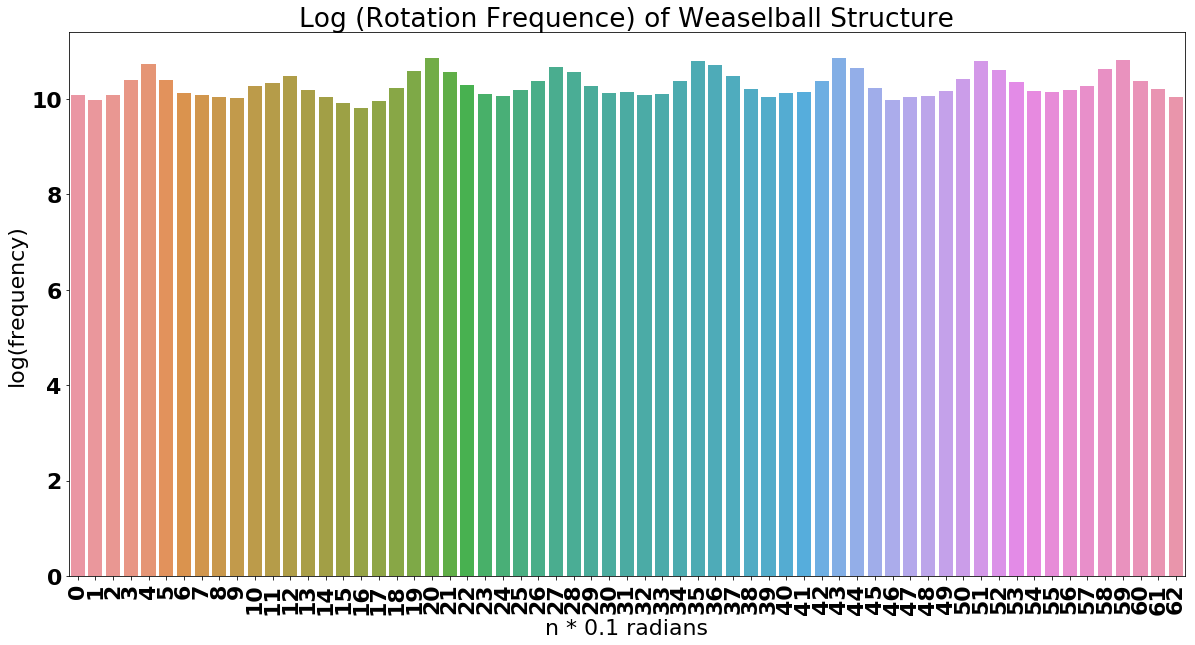

In [80]:
#Create graphic heatmap of rotation without n taken out
#Take the log of everything to it can be graphed better, add 1 to get rid of log(0)
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

heatmap_rotation = np.log(l)
plt.figure(figsize=(20,10))
plt.title('Log (Rotation Frequence) of Weaselball Structure')
plt.xlabel('n * 0.1 radians')
plt.ylabel('log(frequency)')
#plt.plot(heatmap_rotation)
fig = sns.barplot(np.arange(63), heatmap_rotation)
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.savefig(fig_prefix + "rotation_heatmap.png")
plt.show()
